### Ondometro Óptico
- Calcula periodo de cada onda individual a partir da serie temporal de brilho

In [1]:
import numpy as np
import pandas as pd
from scipy.signal import find_peaks
import matplotlib.pyplot as plt

In [2]:
# carrega serie de brilho

pth_out = '/home/hp/gdrive/ondometro_optico/'

fln = 'T100_570002'

# leitura do arquivo de brilho
bri = pd.read_csv(pth_out + 'brilho_{}_CAM1.csv'.format(fln), index_col='time')

# vetor 1d da serie de brilho
x = bri.values[:,0]

# retira a media
x = x - x.mean()

In [3]:
x

array([-0.92286364, -2.25286364, -4.25286364, ..., 41.74713636,
       44.74713636, 44.07713636])

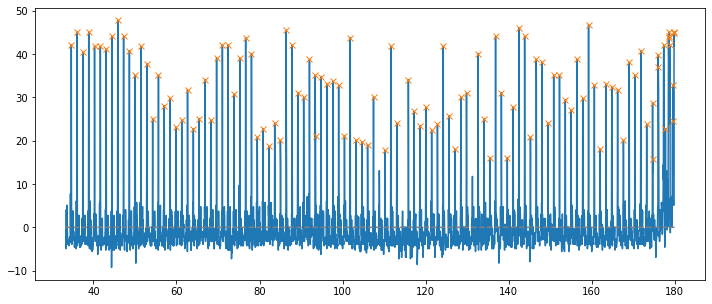

In [4]:
# calcula os picos da serie de brilho

peaks, _ = find_peaks(x, height=15, threshold=None, distance=None,
                      prominence=None, width=None, wlen=None,
                      rel_height=None, plateau_size=None)

%matplotlib inline

fig, ax = plt.subplots(figsize=(12,5))
ax.plot(bri.index, x)
ax.plot(bri.index[peaks], x[peaks], "x")
ax.plot(bri.index, np.zeros_like(x), "--", color="gray")

In [5]:
# valores de periodo individual

Tind = np.diff(bri.index[peaks])
Tind

array([1.4 , 1.4 , 1.4 , 1.4 , 1.4 , 1.4 , 1.4 , 1.4 , 1.4 , 1.4 , 1.4 ,
       1.4 , 1.4 , 1.4 , 1.4 , 1.4 , 1.4 , 1.4 , 1.4 , 1.4 , 1.4 , 1.4 ,
       1.4 , 1.4 , 1.4 , 1.4 , 1.4 , 1.4 , 1.4 , 1.4 , 1.4 , 1.4 , 1.4 ,
       1.4 , 1.4 , 1.37, 1.4 , 1.4 , 1.4 , 1.4 , 1.4 , 1.4 , 0.06, 1.37,
       1.4 , 1.4 , 1.4 , 1.4 , 1.4 , 1.4 , 1.4 , 1.37, 1.43, 2.77, 1.4 ,
       1.43, 2.8 , 1.37, 1.43, 1.4 , 1.4 , 1.4 , 1.4 , 1.4 , 1.4 , 1.43,
       1.37, 2.8 , 1.4 , 1.4 , 1.4 , 1.4 , 1.43, 1.4 , 1.37, 1.4 , 1.4 ,
       1.4 , 1.4 , 1.4 , 1.4 , 1.4 , 1.4 , 1.4 , 1.4 , 1.4 , 1.4 , 1.4 ,
       1.4 , 1.4 , 1.4 , 1.4 , 1.4 , 1.4 , 1.4 , 1.4 , 1.4 , 1.43, 0.07,
       1.23, 0.07, 1.3 , 0.43, 0.73, 0.1 , 0.07, 0.13, 0.67, 0.17, 0.2 ,
       0.06])

In [6]:
periodos = pd.DataFrame(Tind, index=bri.index[peaks].values[:-1], columns=['T'])
periodos.index.name = 'time'

In [7]:
periodos

,T
time,
34.66,1.40
36.06,1.40
37.46,1.40
38.86,1.40
40.26,1.40
...,...
178.69,0.13
178.82,0.67
179.49,0.17


<AxesSubplot:xlabel='tempo [s]', ylabel='periodo [s]'>

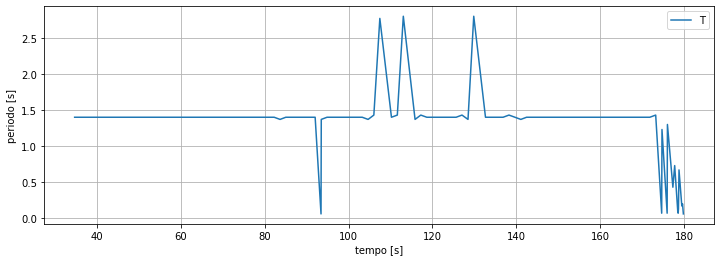

In [8]:
periodos.plot(figsize=(12,4), ylabel='periodo [s]', xlabel='tempo [s]', grid='on')

In [9]:
# salva arquivo em csv

periodos.to_csv(pth_out + 'periodos_individuais.csv', float_format='%.2f')